In [69]:
import numpy as np
from typing import Tuple
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

## **Part (a)**

In [2]:
#part a
def load_dataset(src_dir: str) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
  x_train=np.loadtxt(src_dir+"/x_train.txt")
  y_train=np.loadtxt(src_dir+"/y_train.txt")
  x_val=np.loadtxt(src_dir+"/x_val.txt")
  y_val=np.loadtxt(src_dir+"/y_val.txt")
  x_test=np.loadtxt(src_dir+"/x_test.txt")
  return tuple([x_train,y_train,x_val,y_val,x_test])
  


In [71]:
[x_train,y_train,x_val,y_val,x_test]=load_dataset("/content/Data")

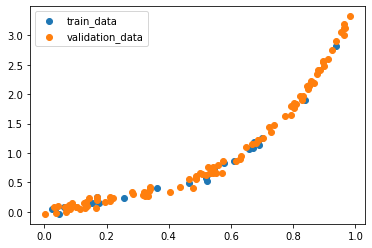

In [72]:
plt.scatter(x_train,y_train,label='train_data')
plt.scatter(x_val,y_val,label='validation_data')
plt.xlabel=('x')
plt.ylabel=('y')
plt.legend()

In [13]:
x_train.shape

(25,)

## **Part(b)- i**

In [34]:
#part(b)-i
def get_features(x: np.ndarray, n: int) -> np.ndarray:
  feature_matrix=np.zeros([x.shape[0],n])
  for j in range(n):
    feature_matrix[:,j]=np.power(x,j+1)
  return feature_matrix

In [42]:
from numpy.ma.core import shape
u=get_features(x_train,3)
u.shape
u

array([[5.18837575e-01, 2.69192429e-01, 1.39667147e-01],
       [1.69344230e-01, 2.86774682e-02, 4.85636376e-03],
       [9.38726014e-01, 8.81206529e-01, 8.27211492e-01],
       [3.26641536e-01, 1.06694693e-01, 3.48509183e-02],
       [5.76482392e-01, 3.32331948e-01, 1.91583516e-01],
       [3.37008789e-02, 1.13574924e-03, 3.82757475e-05],
       [5.22772733e-01, 2.73291330e-01, 1.42869256e-01],
       [2.57017338e-01, 6.60579120e-02, 1.69780287e-02],
       [6.89956328e-01, 4.76039735e-01, 3.28446628e-01],
       [4.74013040e-02, 2.24688362e-03, 1.06505213e-04],
       [7.00210524e-01, 4.90294778e-01, 3.43309563e-01],
       [8.38439242e-01, 7.02980362e-01, 5.89406322e-01],
       [5.22936698e-01, 2.73462790e-01, 1.43003729e-01],
       [5.46433927e-01, 2.98590037e-01, 1.63159726e-01],
       [6.73018365e-01, 4.52953720e-01, 3.04846172e-01],
       [6.57228310e-01, 4.31949051e-01, 2.83889145e-01],
       [1.51906865e-01, 2.30756956e-02, 3.50535657e-03],
       [3.63548373e-01, 1.32167

In [23]:
feature_matrix=np.zeros([4,5])

feature_matrix[:,2]=[1,1,1,1]
print(feature_matrix)


[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


## **Part (b)-ii**

In [38]:
#Part(b)-ii
LR=LinearRegression()
mse=mean_squared_error

In [39]:
def fit_and_evaluate(x_train: np.ndarray, y_train: np.ndarray,x_val: np.ndarray, y_val: np.ndarray,n: int) -> Tuple[float, float]:
   model = LR.fit(get_features(x_train,n), y_train)
   y_predict_train = model.predict(get_features(x_train,n))
   train_mse = mse(y_train, y_predict_train)


   model = LR.fit(get_features(x_val,n), y_val)
   y_predict_val = model.predict(get_features(x_val,n))
   val_mse = mse(y_val, y_predict_val)
   return train_mse, val_mse


In [45]:
fit_and_evaluate(x_train,y_train,x_val,y_val,10)

(0.0013859118486101143, 0.0025579346443144585)

## **Part (c)**

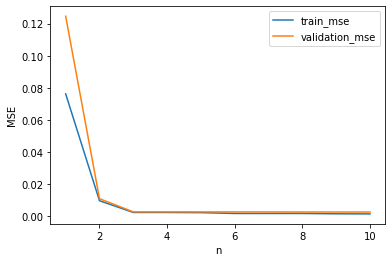

In [51]:
#part(c)
train_mse_values=[]
val_mse_values=[]
for i in range (0,10):
  [train_mse,val_mse]=fit_and_evaluate(x_train,y_train,x_val,y_val,i+1)
  train_mse_values.append(train_mse)
  val_mse_values.append(val_mse)

plt.plot(range(1,11),train_mse_values,label="train_mse")
plt.plot(range(1,11),val_mse_values,label='validation_mse')
plt.xlabel("n")
plt.ylabel("MSE")
plt.legend()
plt.show()



  


In [73]:
print(train_mse_values.index(min(train_mse_values))+1)
print(val_mse_values.index(min(val_mse_values))+1)


10
10


### **Part (d)**

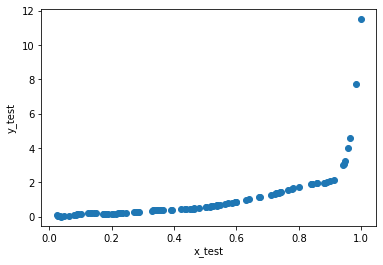

In [70]:
#part(b)
min_n=10
final_model = LR.fit(get_features(x_train,min_n), y_train)
y_test = final_model.predict(get_features(x_test,min_n))
#print(y_test)
text=''
for i in range(len(y_test)):
  line=y_test[i]
  text=text+str(line)+"\n"
text_file = open("/content/Data/170416V_y_predict_test.txt", "w")
n = text_file.write(text)
text_file.close()
#print(text)
plt.scatter(x_test,y_test)
plt.xlabel("x_test")
plt.ylabel("y_test")
plt.show()